In [1]:
## Useful imports

In [2]:
from datetime import datetime
from datetime import timedelta
import numpy as np
import pandas as pd
import sys
import os
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import cPickle as pickle
import scipy
import scipy.sparse.linalg
%matplotlib inline

from datetime import datetime

In [3]:
input_data_folder = '../../data/processed/'

data_files = filter(lambda x: x[-4:] == '.csv', os.listdir(input_data_folder))

In [4]:
print data_files

['nfbVD-5N-0.178.csv', 'nfbVD-5N-0.706.csv', 'nfbVD-5N-13.348.csv', 'nfbVD-5N-13.763.csv', 'nfbVD-5N-14.550.csv', 'nfbVD-5N-14.800.csv', 'nfbVD-5N-28.420.csv', 'nfbVD-5N-30.100.csv', 'nfbVD-5N-4.058.csv', 'nfbVD-5N-4.400.csv', 'nfbVD-5N-4.460.csv', 'nfbVD-5N-5.523.csv', 'nfbVD-5N-5.883.csv', 'nfbVD-5N-6.413.csv', 'nfbVD-5N-7.113.csv', 'nfbVD-5N-7.636.csv', 'nfbVD-5N-8.043.csv', 'nfbVD-5N-8.703.csv', 'nfbVD-5N-9.013.csv', 'nfbVD-5N-PLIC-I-14.583.csv', 'nfbVD-5N-PLIC-O-14.683.csv', 'nfbVD-5N-PST-10.147.csv', 'nfbVD-5N-PST-10.506.csv', 'nfbVD-5N-PST-11.178.csv', 'nfbVD-5N-PST-11.555.csv', 'nfbVD-5N-PST-12.238.csv', 'nfbVD-5N-PST-12.579.csv', 'nfbVD-5N-PST-12.922.csv', 'nfbVD-5N-PST-9.373.csv', 'nfbVD-5N-PST-9.840.csv', 'nfbVD-5N-PST-P-10.866.csv', 'nfbVD-5N-PST-P-11.896.csv', 'nfbVD-5N-SDIC-I-4.044.csv', 'nfbVD-5N-SDIC-O-4.455.csv', 'nfbVD-5N-SDT-1.068.csv', 'nfbVD-5N-SDT-1.435.csv', 'nfbVD-5N-SDT-1.788.csv', 'nfbVD-5N-SDT-2.068.csv', 'nfbVD-5N-SDT-2.455.csv', 'nfbVD-5N-SDT-2.849.csv', 'n

In [5]:
northbound_files = filter(lambda x: '5N' in x, data_files)
southbound_files = filter(lambda x : '5S' in x, data_files)

In [6]:
def extract_km(in_filename):
    return float(x.split('-')[-1][:-4])

In [7]:
northbound_data = [(x, extract_km(x), pd.read_csv(input_data_folder + x, na_values = '-1')) 
                   for x in northbound_files]
southbound_data = [(x, extract_km(x), pd.read_csv(input_data_folder + x, na_values = '-1')) 
                   for x in southbound_files]

northbound_data.sort(key = (lambda x : x[1]))
southbound_data.sort(key = (lambda x : x[1]))

In [8]:
northbound_data[0][2]

vdid  status            timestamp  speed  occupy   S  T  L  \
0      nfbVD-5N-0.178       0  2015/03/31 23:50:00   83.5     1.0  21  2  0   
1      nfbVD-5N-0.178       0  2015/04/01 00:10:00   81.0     0.0  16  0  0   
2      nfbVD-5N-0.178       0  2015/04/01 00:15:00   85.5     1.0  16  1  0   
3      nfbVD-5N-0.178       0  2015/04/01 00:25:00   81.0     0.0  14  0  0   
4      nfbVD-5N-0.178       0  2015/04/01 00:30:00   89.5     0.0  14  0  0   
5      nfbVD-5N-0.178       0  2015/04/01 00:40:00   90.0     0.0  14  0  0   
6      nfbVD-5N-0.178       0  2015/04/01 00:45:00   85.0     0.5  21  1  0   
7      nfbVD-5N-0.178       0  2015/04/01 00:50:00   84.5     0.0  15  0  0   
8      nfbVD-5N-0.178       0  2015/04/01 00:55:00   80.0     0.5  14  0  0   
9      nfbVD-5N-0.178       0  2015/04/01 01:00:00   84.0     0.0  11  0  0   
10     nfbVD-5N-0.178       0  2015/04/01 01:05:00   84.5     0.0  11  0  0   
11     nfbVD-5N-0.178       0  2015/04/01 01:20:00   81.5     0.0   4  0  0   
12     nfbVD-5N-0.178       0  2015/04/01 01:30:00   92.5     0.0   5  0  0   
13     nfbVD-5N-0.178       0  2015/04/01 01:35:00   85.5     0.5  15  1  0   
14     nfbVD-5N-0.178       0  2015/04/01 01:45:00   85.0     0.0  12  0  0   
15     nfbVD-5N-0.178       0  2015/04/01 01:55:00   80.5     0.0  13  0  0   
16     nfbVD-5N-0.178       0  2015/04/01 02:05:00   98.0     0.0  13  0  0   
17     nfbVD-5N-0.178       0  2015/04/01 02:10:00   90.0     0.0  10  0  0   
18     nfbVD-5N-0.178       0  2015/04/01 02:15:00   84.5     0.0  15  0  0   
19     nfbVD-5N-0.178       0  2015/04/01 02:20:00   88.0     0.5  10  0  0   
20     nfbVD-5N-0.178       0  2015/04/01 02:45:00   81.5     0.0   8  0  0   
21     nfbVD-5N-0.178       0  2015/04/01 02:50:00   83.5     0.0   5  0  0   
22     nfbVD-5N-0.178       0  2015/04/01 03:15:00   86.5     0.0   7  0  0   
23     nfbVD-5N-0.178       0  2015/04/01 03:20:00   82.0     0.0   7  0  0   
24     nfbVD-5N-0.178       0  2015/04/01 08:05:00   84.0     3.5  53  5  0   
25     nfbVD-5N-0.178       0  2015/04/01 08:20:00   83.5     2.5  37  5  0   
26     nfbVD-5N-0.178       0  2015/04/01 08:25:00   84.5     2.5  42  4  0   
27     nfbVD-5N-0.178       0  2015/04/01 22:55:00   83.0     2.0  38  2  0   
28     nfbVD-5N-0.178       0  2015/04/09 23:50:00   84.0     1.0  20  2  0   
29     nfbVD-5N-0.178       0  2015/04/09 23:55:00   79.5     0.5  17  0  0   
...               ...     ...                  ...    ...     ...  .. .. ..   
23107  nfbVD-5N-0.178       0  2015/05/08 21:15:00   78.5     3.5  46  5  0   
23108  nfbVD-5N-0.178       0  2015/05/08 21:20:00   79.0     5.0  65  5  0   
23109  nfbVD-5N-0.178       0  2015/05/08 21:25:00   81.5     5.0  70  4  0   
23110  nfbVD-5N-0.178       0  2015/05/08 21:30:00   77.5     5.0  69  2  0   
23111  nfbVD-5N-0.178       0  2015/05/08 21:35:00   80.5     3.5  47  5  0   
23112  nfbVD-5N-0.178       0  2015/05/08 21:40:00   79.0     4.0  52  4  0   
23113  nfbVD-5N-0.178       0  2015/05/08 21:50:00   82.0     3.5  49  5  0   
23114  nfbVD-5N-0.178       0  2015/05/08 21:55:00   78.0     4.5  62  6  0   
23115  nfbVD-5N-0.178       0  2015/05/08 22:00:00   80.5     4.0  57  3  0   
23116  nfbVD-5N-0.178       0  2015/05/08 22:05:00   78.0     5.0  67  5  0   
23117  nfbVD-5N-0.178       0  2015/05/08 22:10:00   80.0     4.5  64  4  0   
23118  nfbVD-5N-0.178       0  2015/05/08 22:15:00   79.0     3.5  43  4  0   
23119  nfbVD-5N-0.178       0  2015/05/08 22:20:00   79.0     3.5  51  3  0   
23120  nfbVD-5N-0.178       0  2015/05/08 22:25:00   82.5     4.0  57  5  0   
23121  nfbVD-5N-0.178       0  2015/05/08 22:30:00   81.5     3.5  46  5  0   
23122  nfbVD-5N-0.178       0  2015/05/08 22:35:00   82.5     3.0  46  3  0   
23123  nfbVD-5N-0.178       0  2015/05/08 22:40:00   79.0     4.0  56  5  0   
23124  nfbVD-5N-0.178       0  2015/05/08 22:45:00   83.0     3.0  47  1  0   
23125  nfbVD-5N-0.178       0  2015/05/08 22:50:00   81.0     3.0  

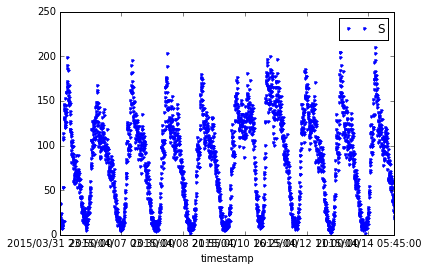

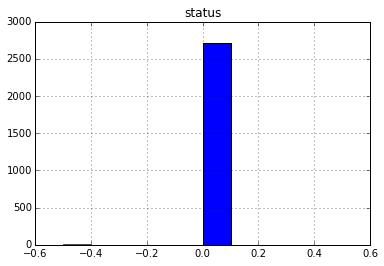

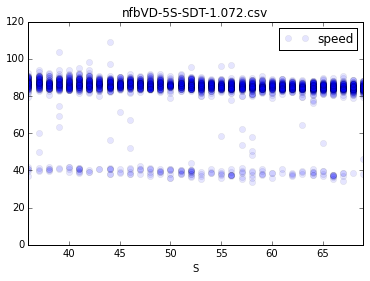

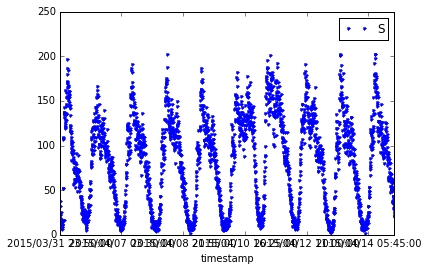

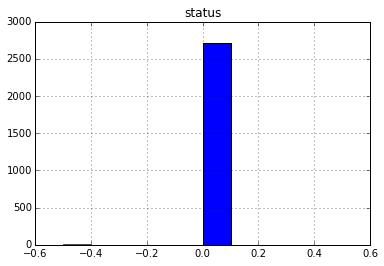

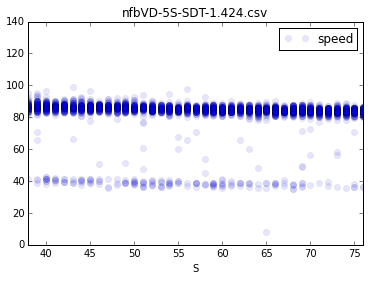

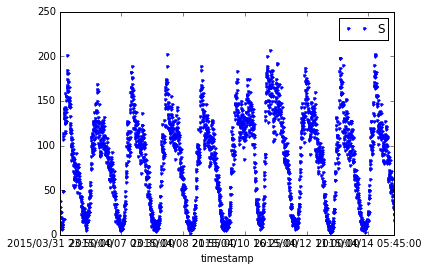

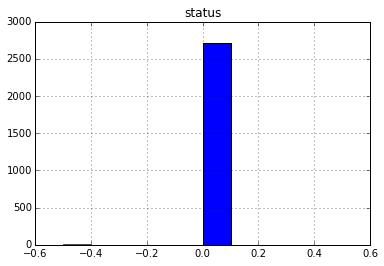

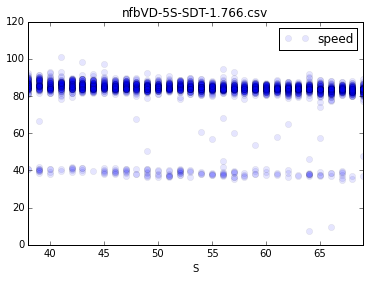

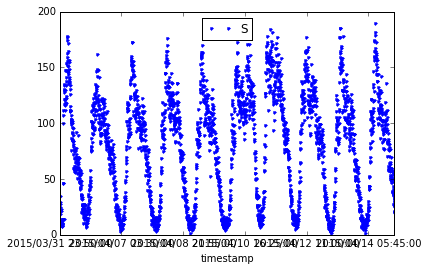

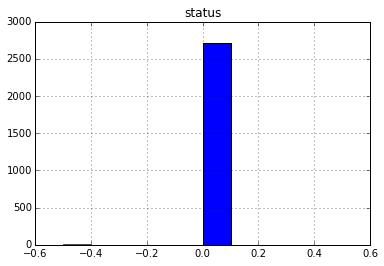

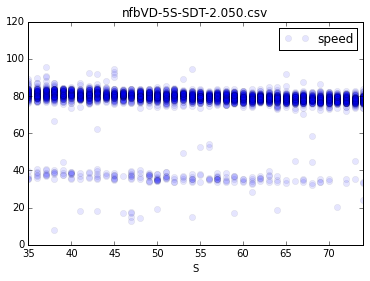

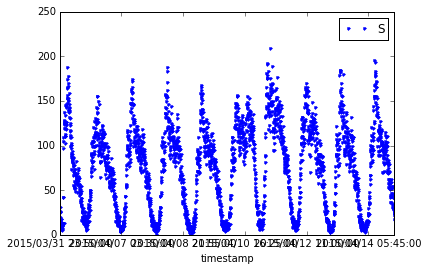

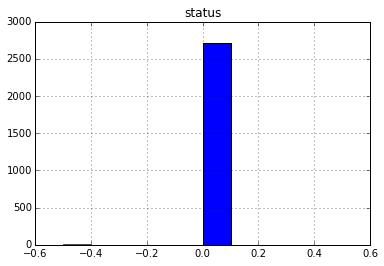

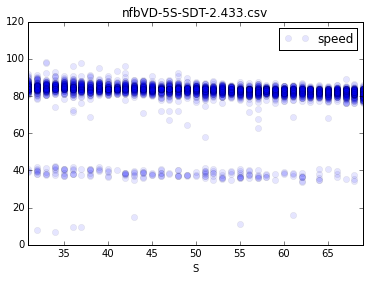

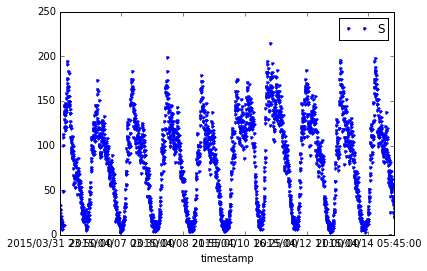

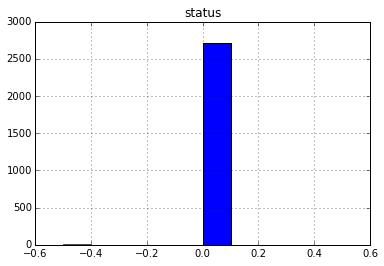

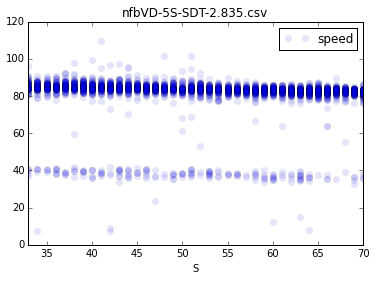

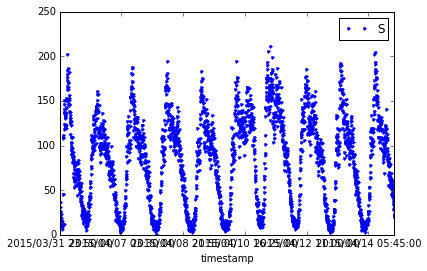

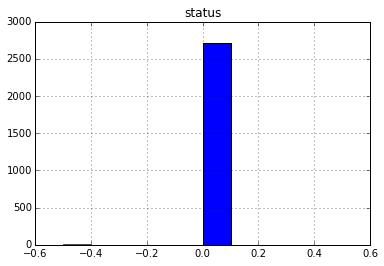

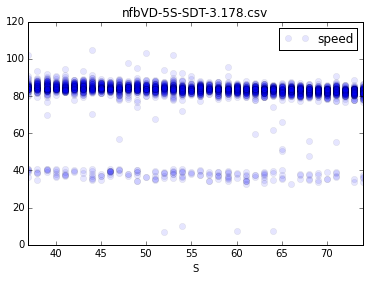

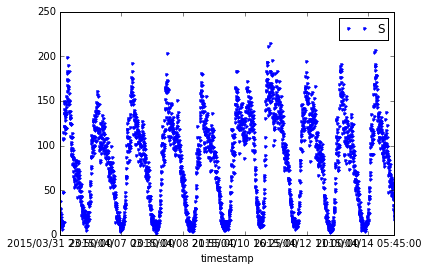

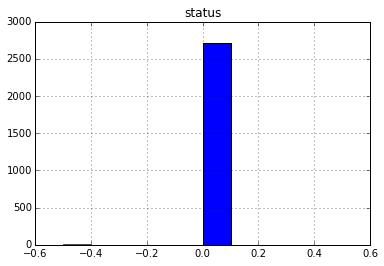

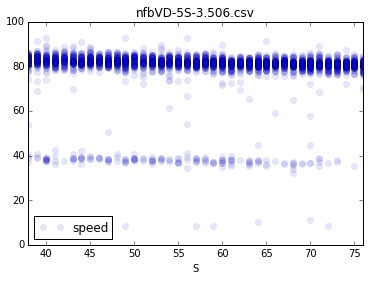

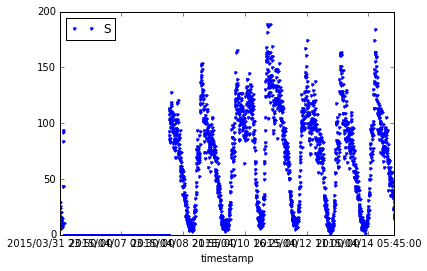

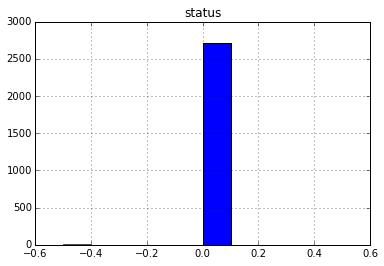

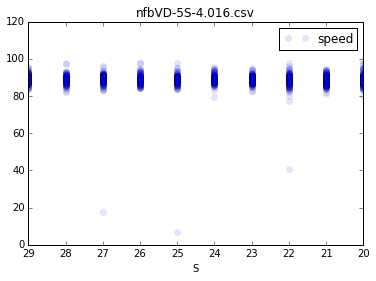

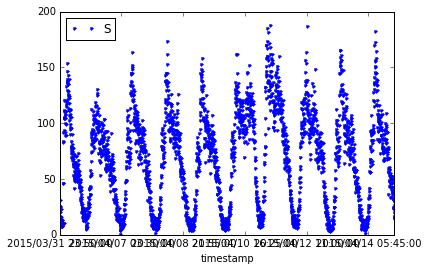

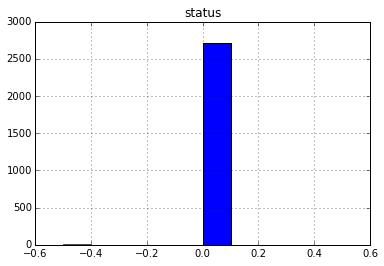

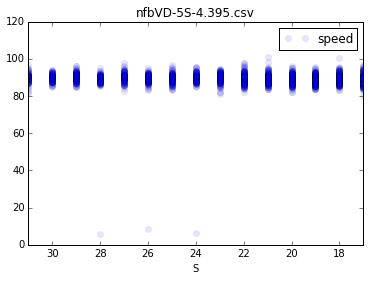

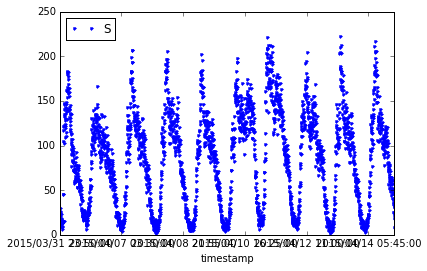

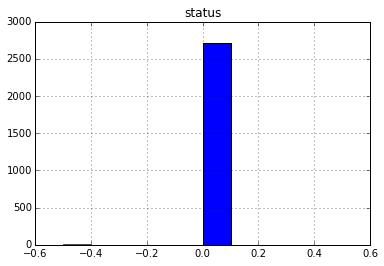

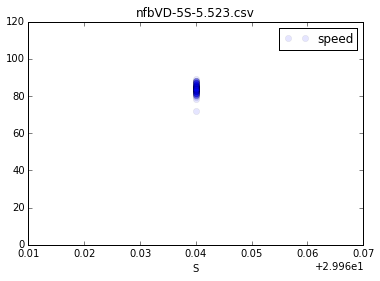

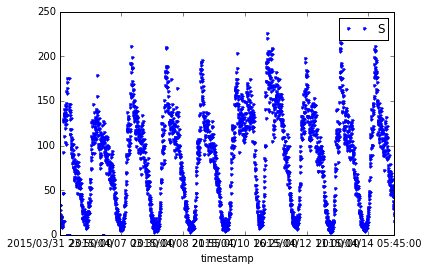

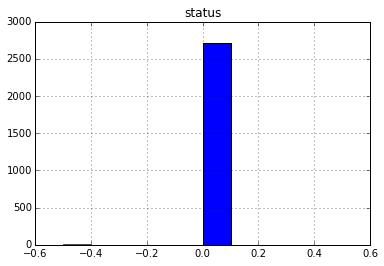

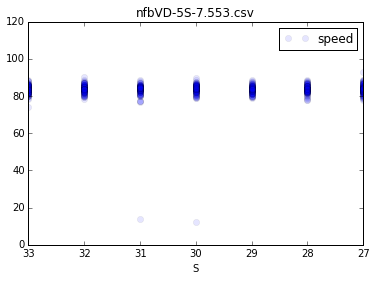

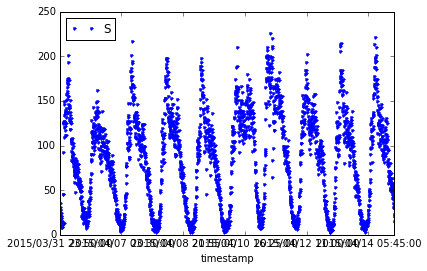

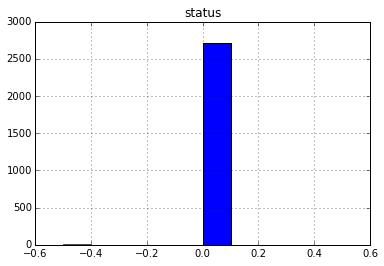

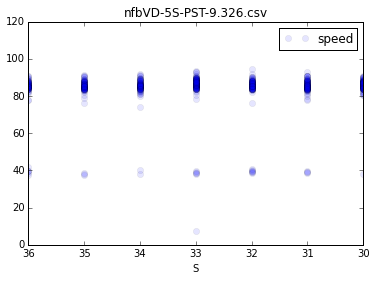

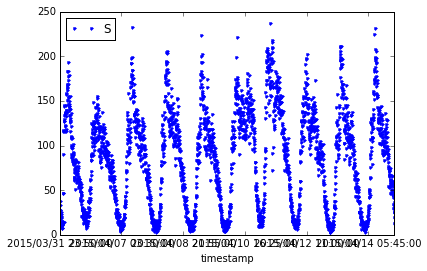

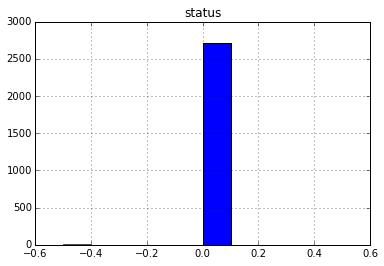

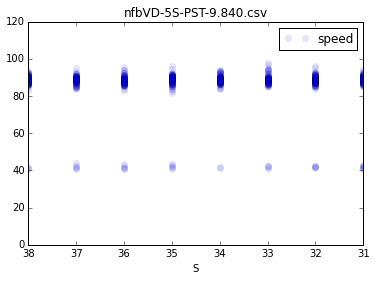

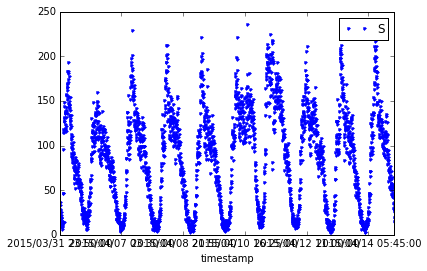

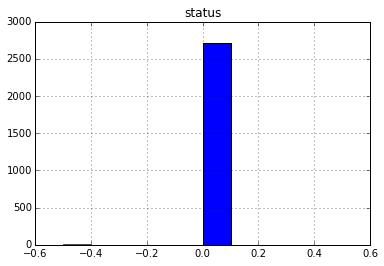

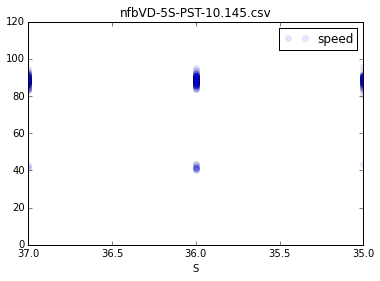

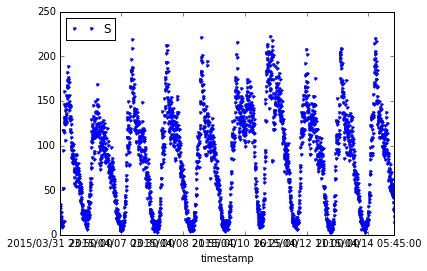

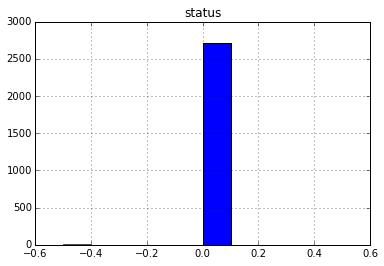

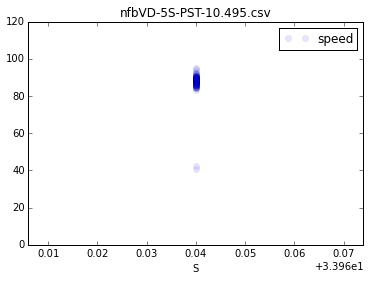

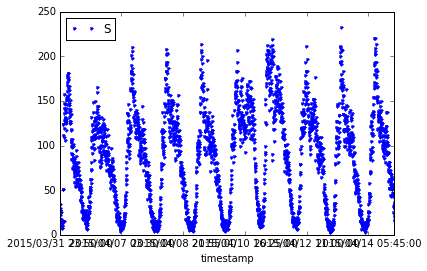

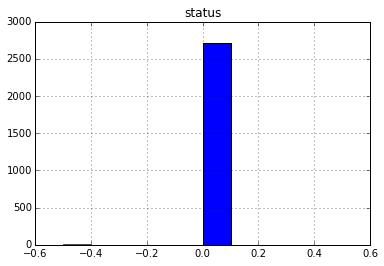

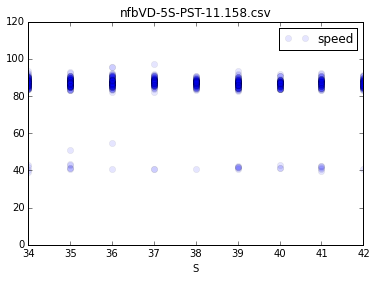

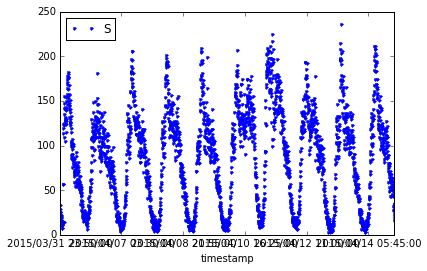

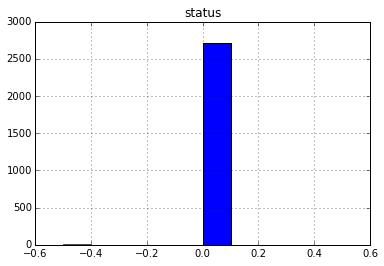

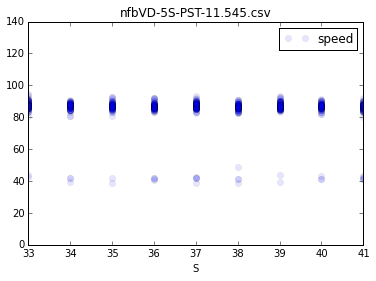

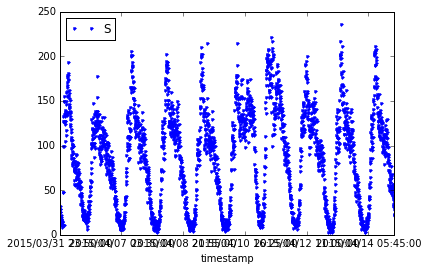

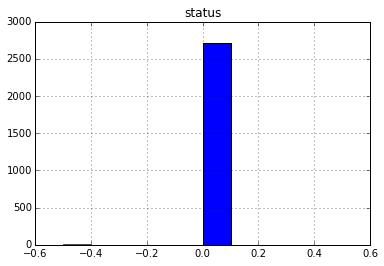

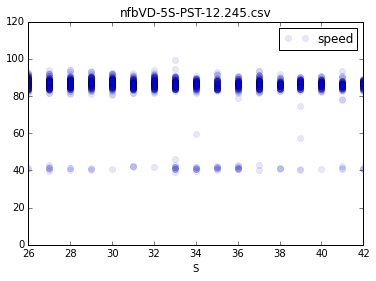

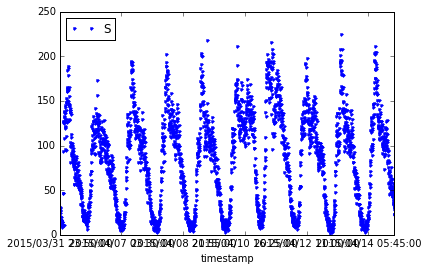

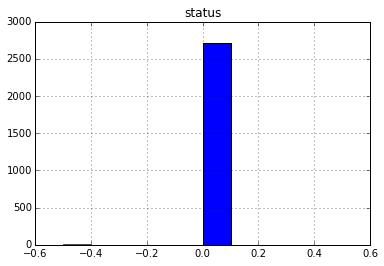

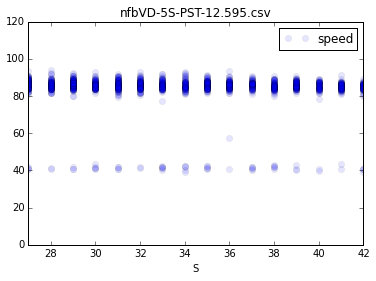

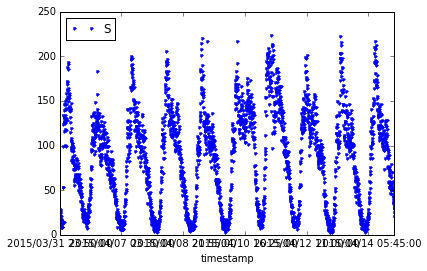

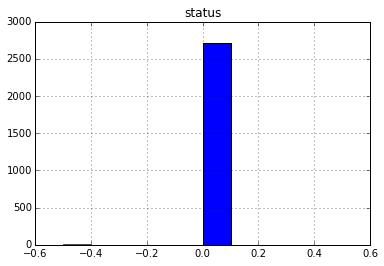

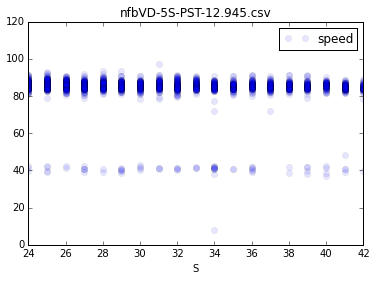

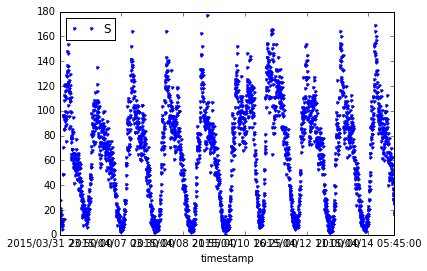

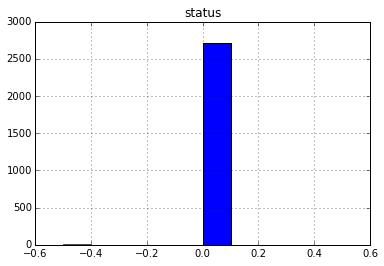

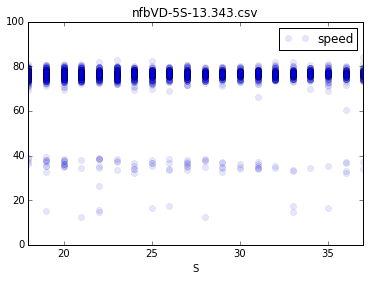

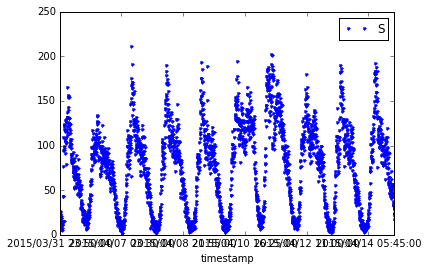

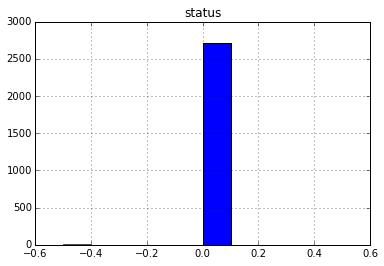

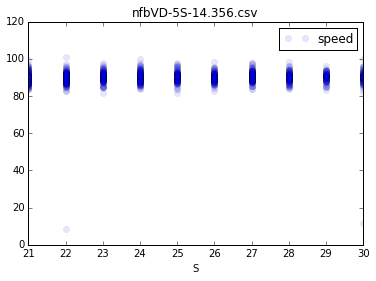

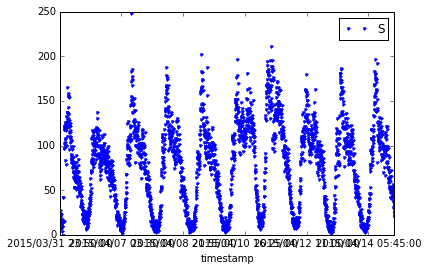

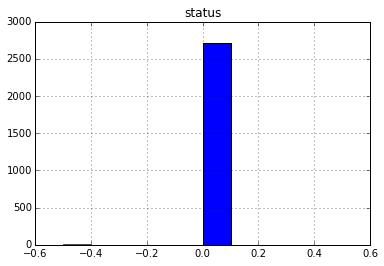

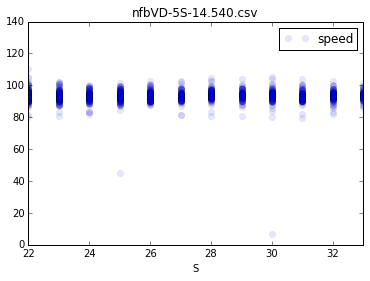

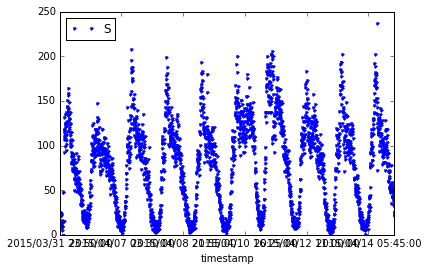

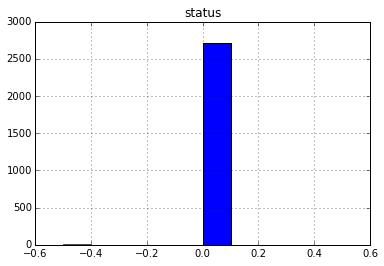

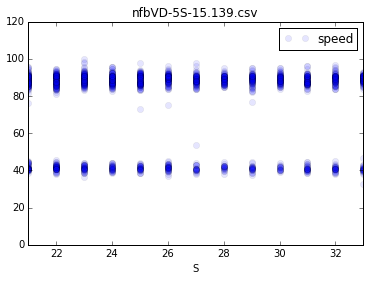

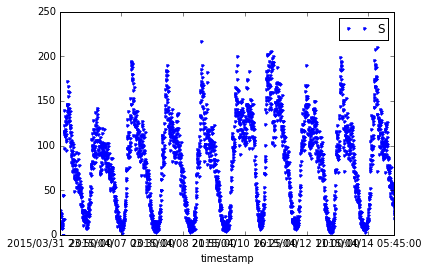

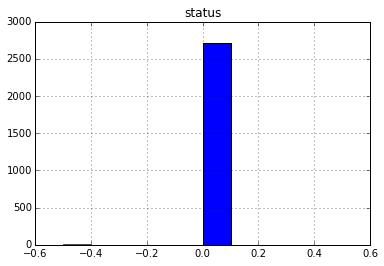

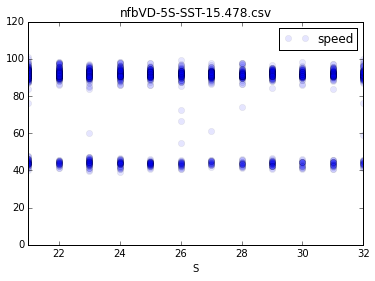

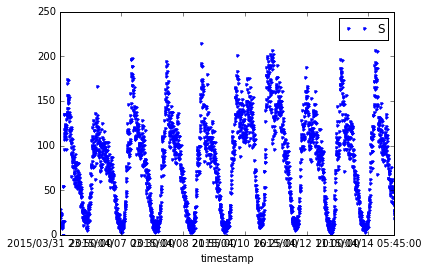

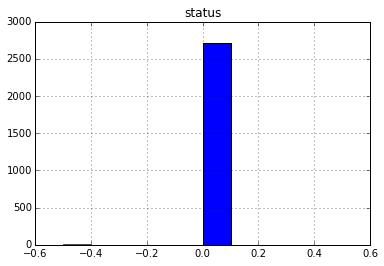

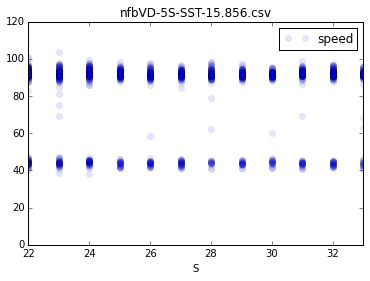

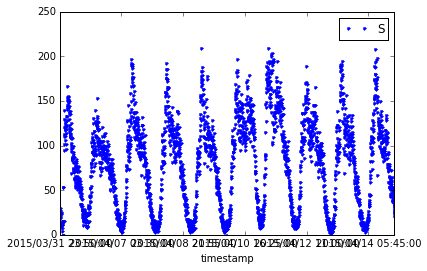

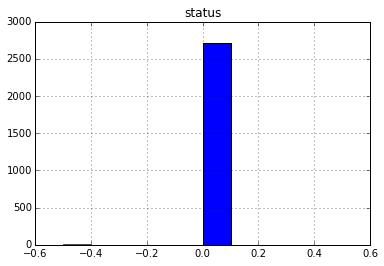

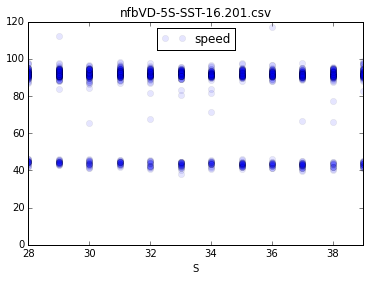

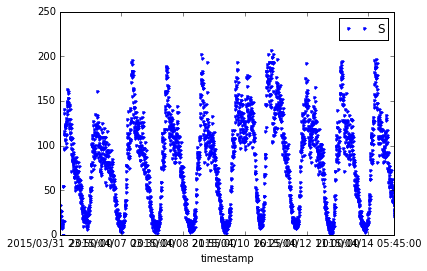

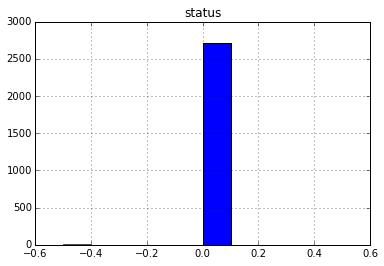

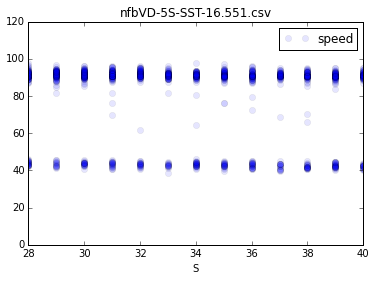

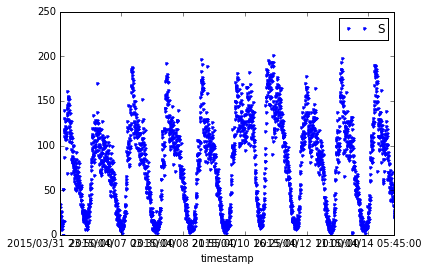

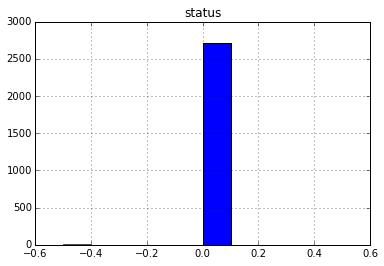

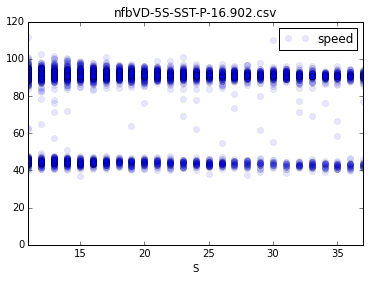

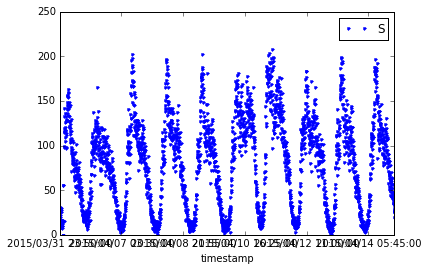

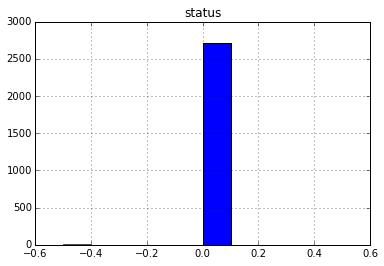

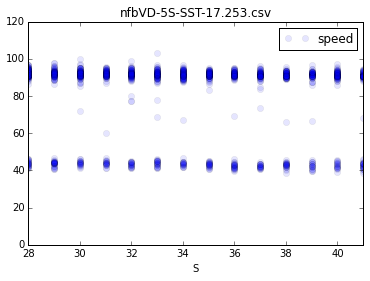

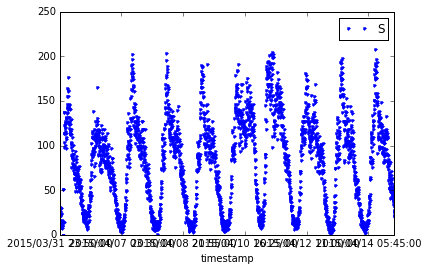

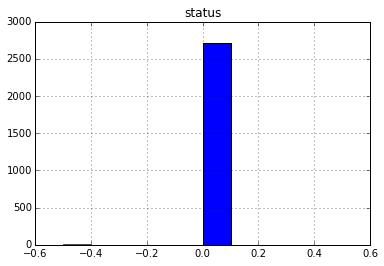

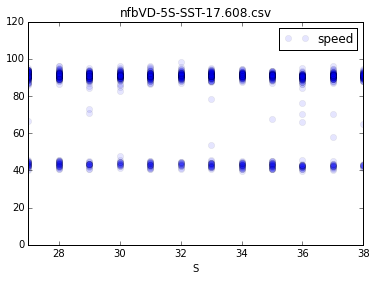

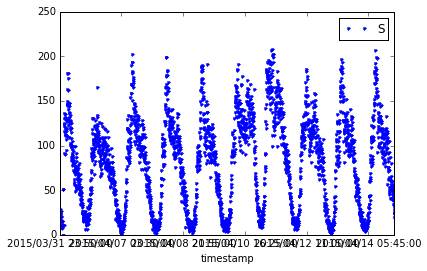

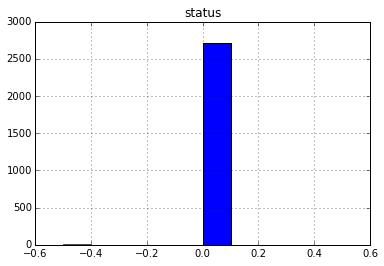

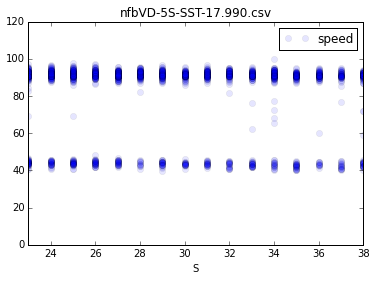

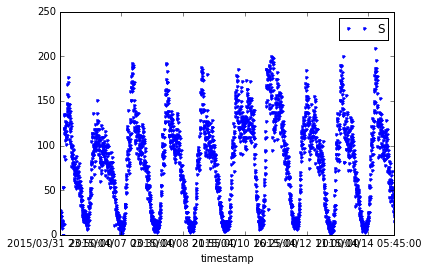

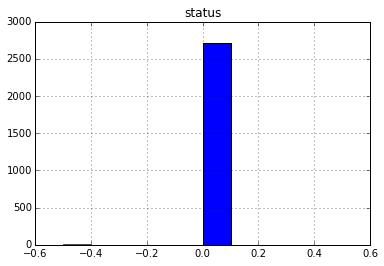

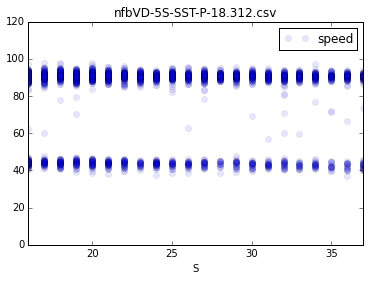

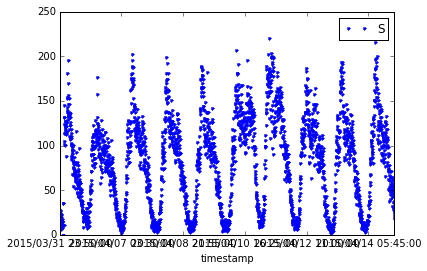

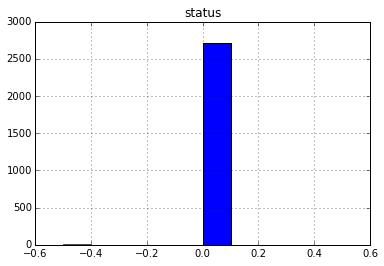

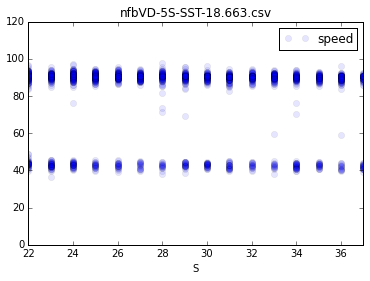

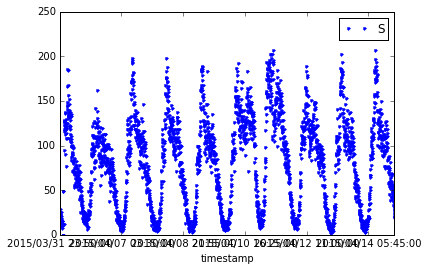

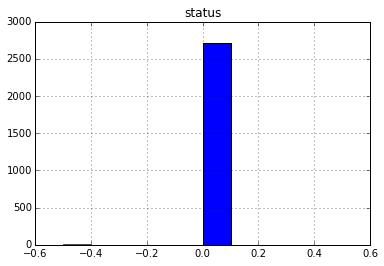

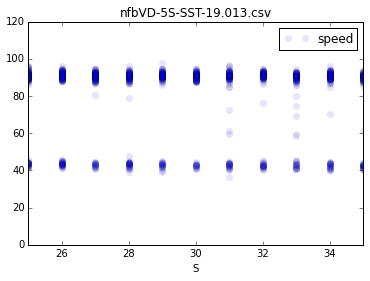

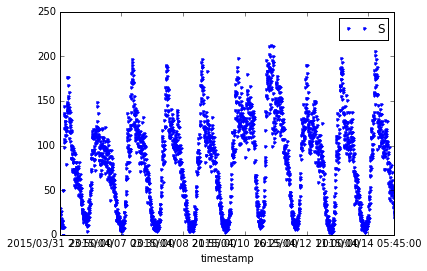

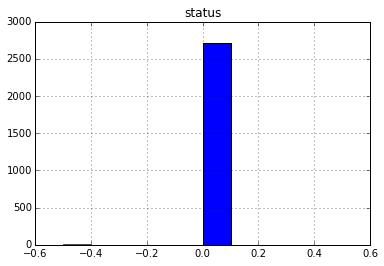

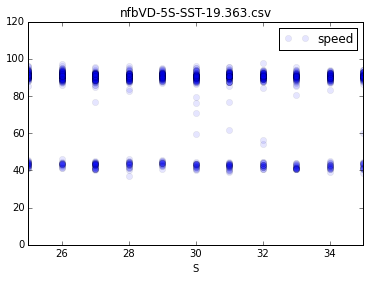

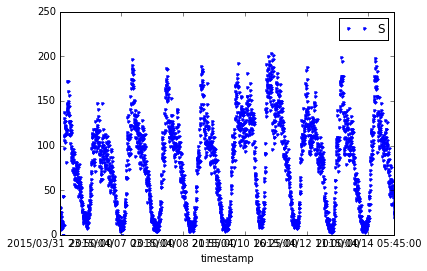

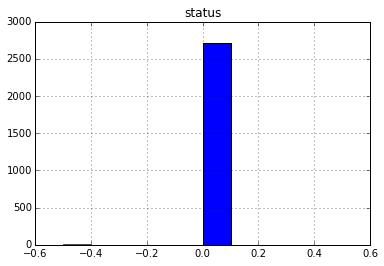

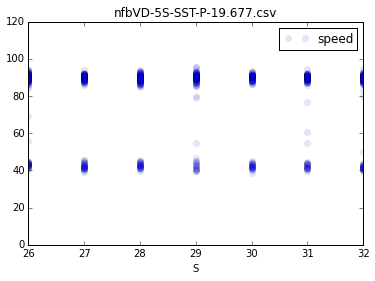

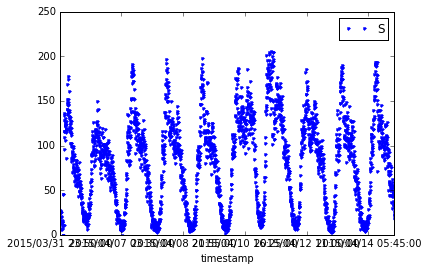

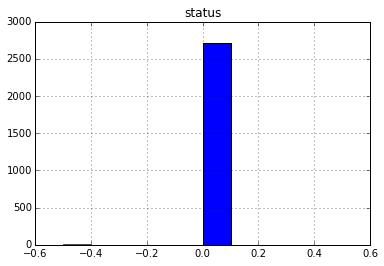

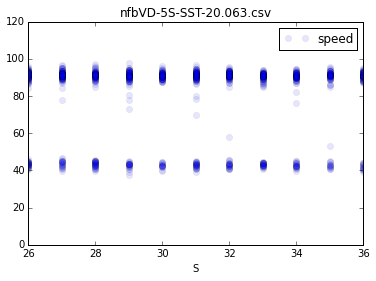

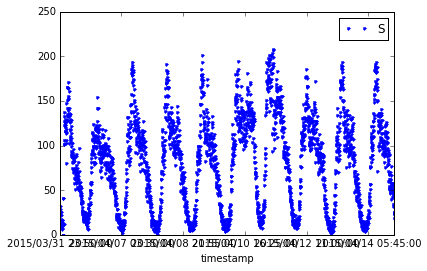

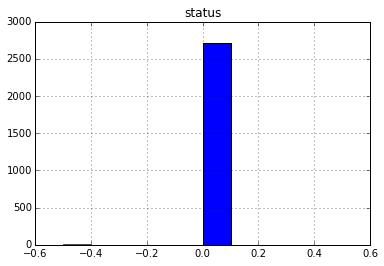

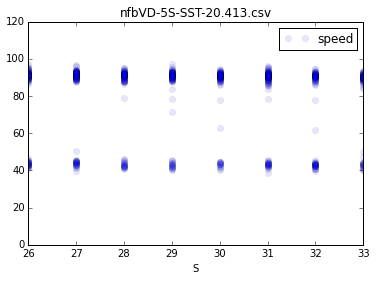

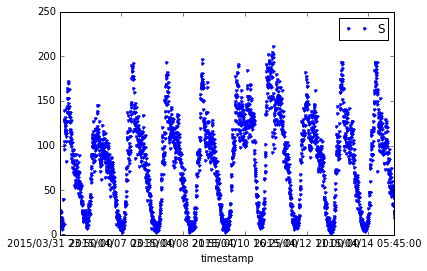

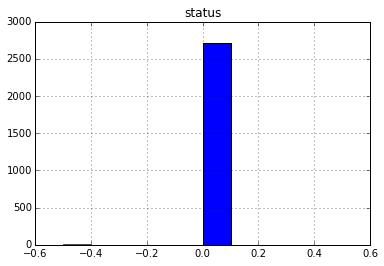

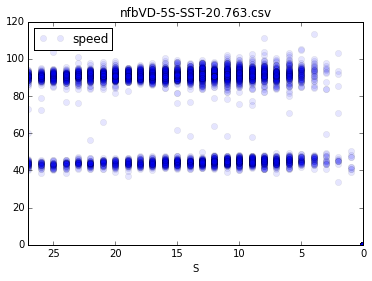

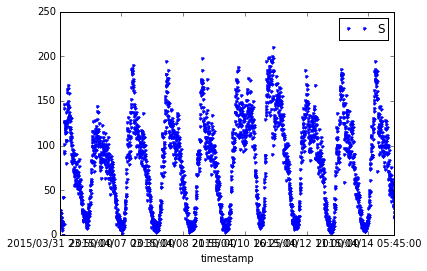

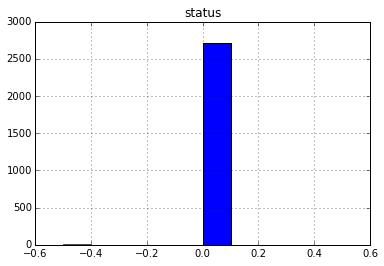

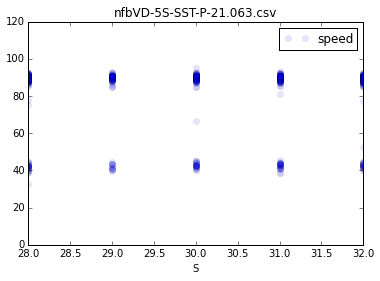

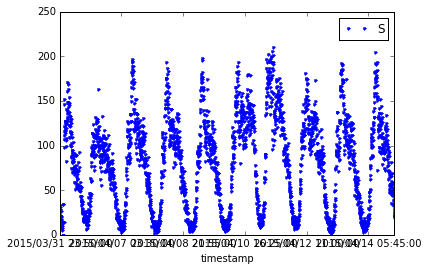

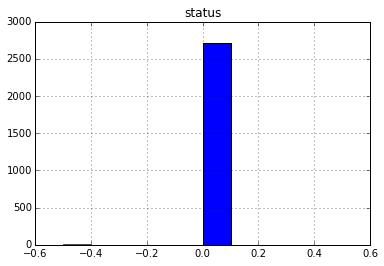

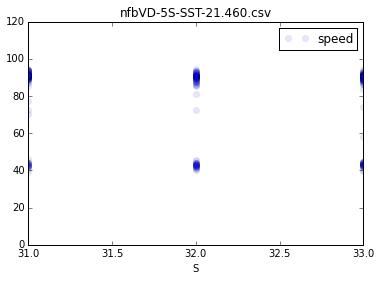

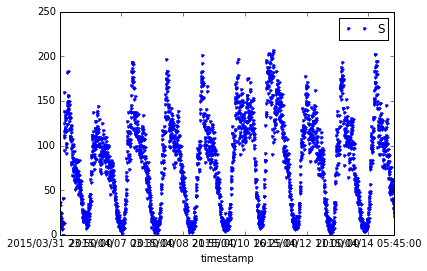

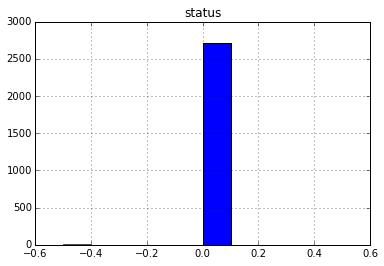

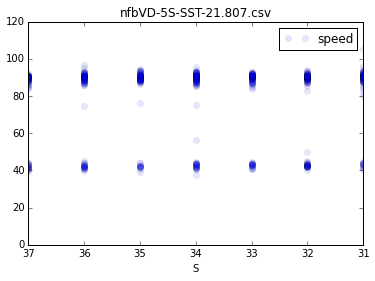

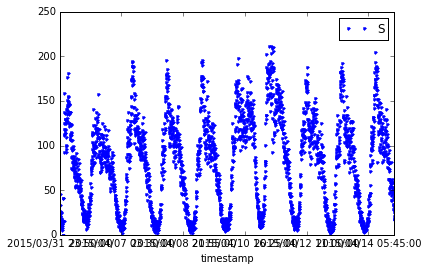

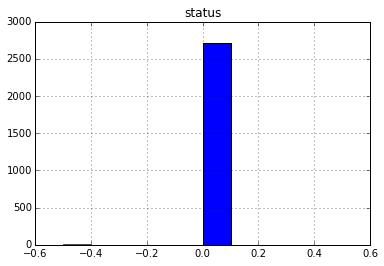

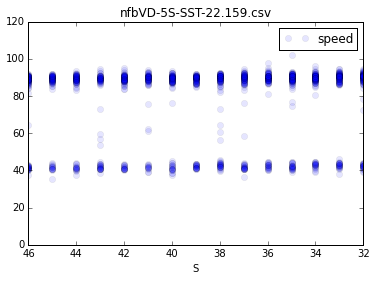

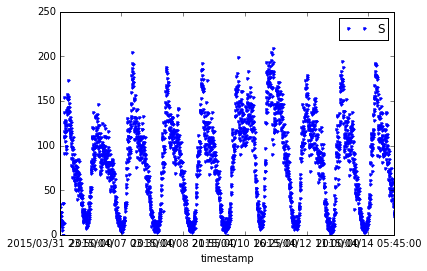

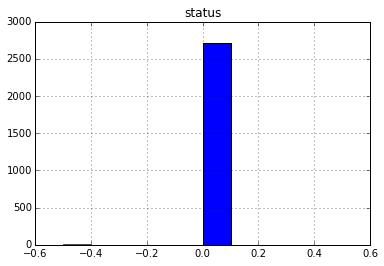

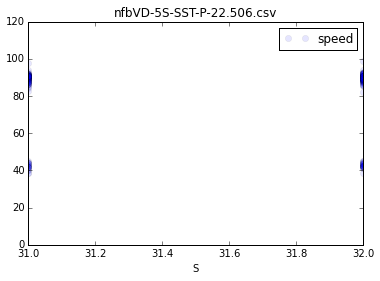

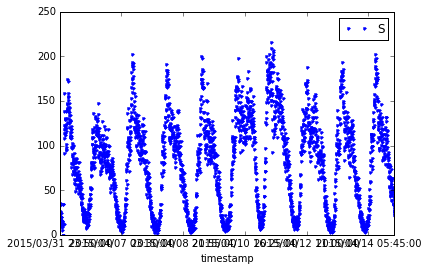

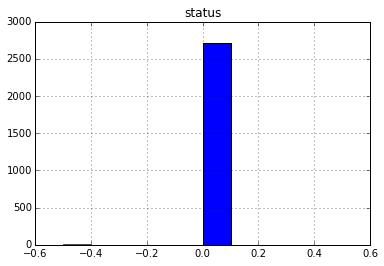

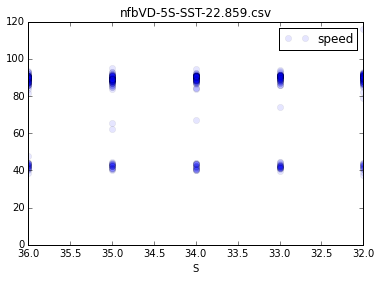

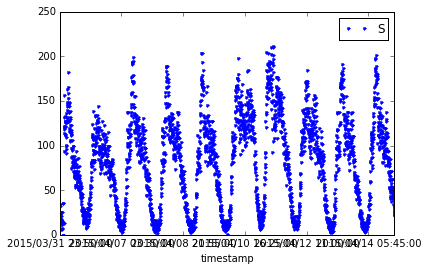

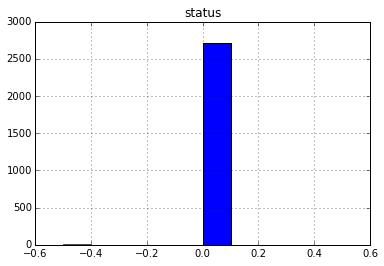

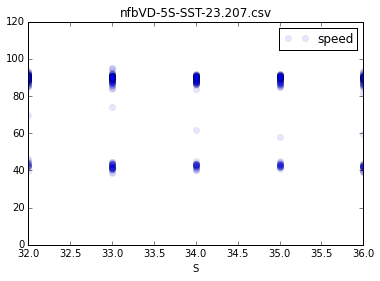

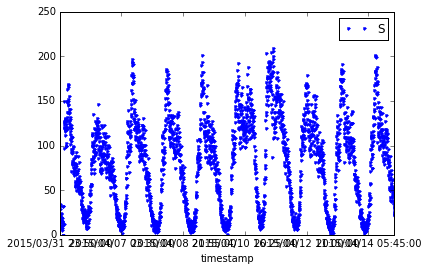

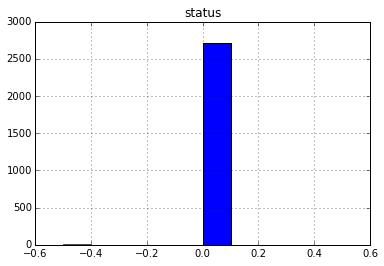

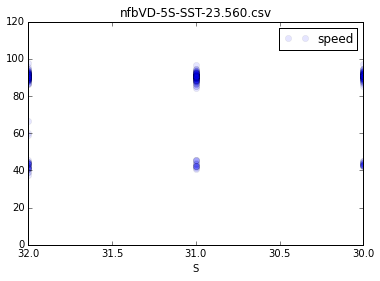

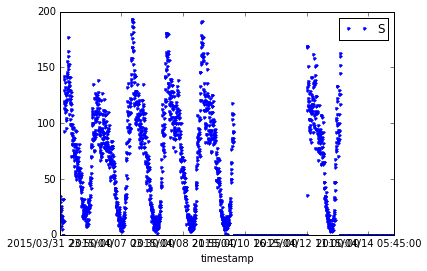

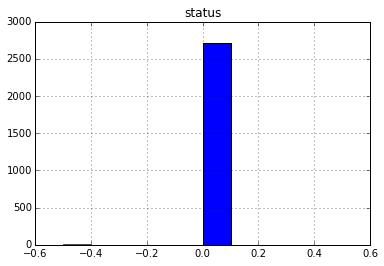

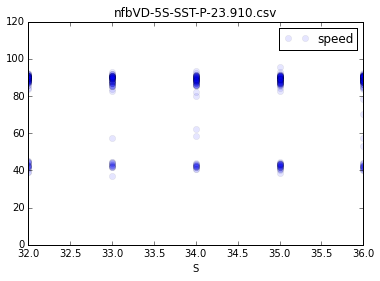

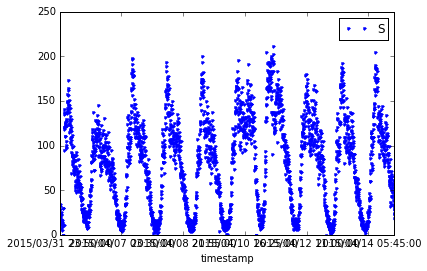

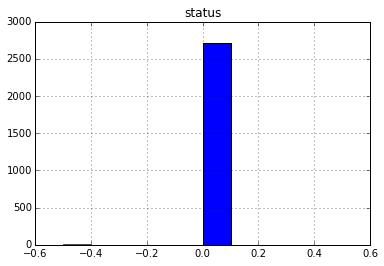

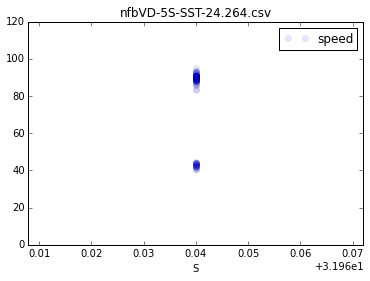

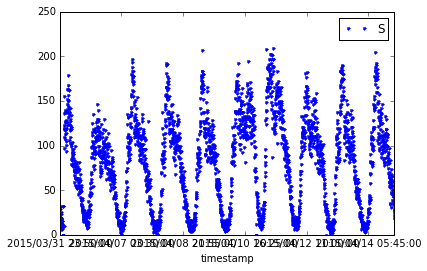

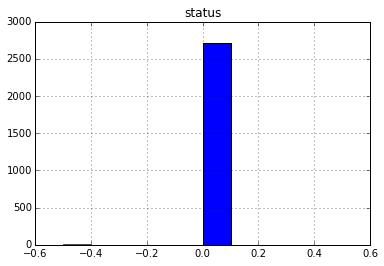

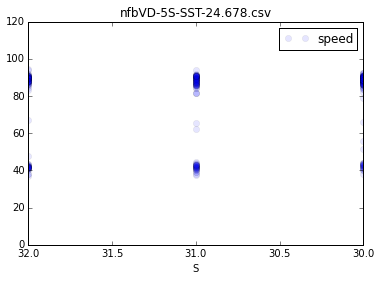

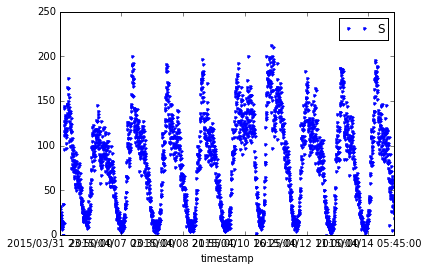

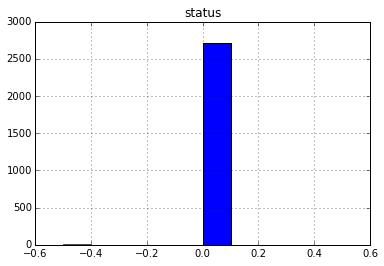

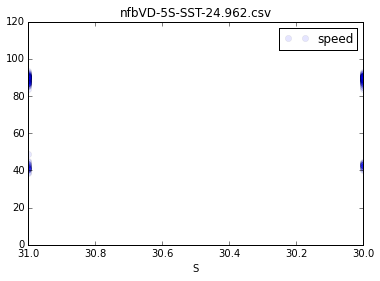

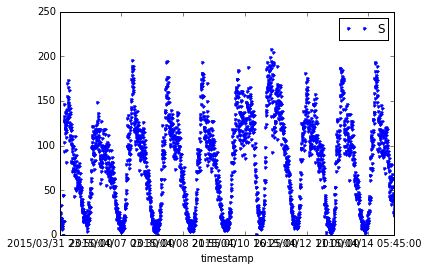

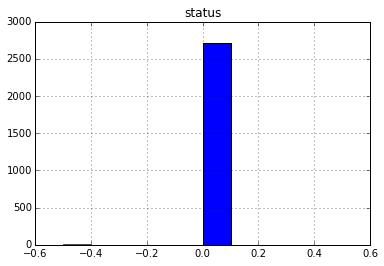

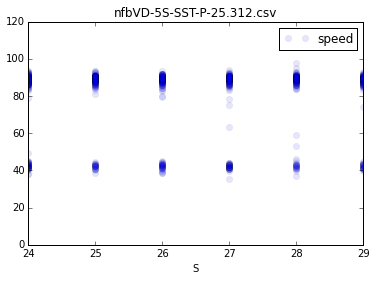

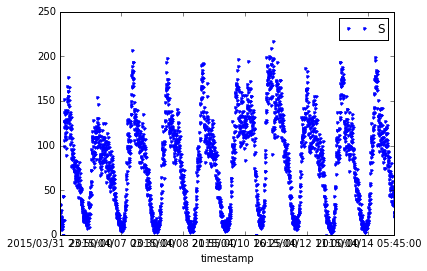

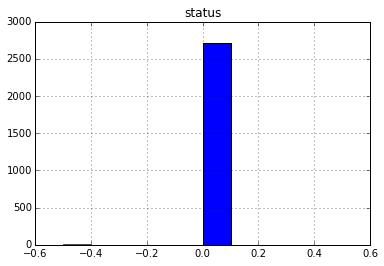

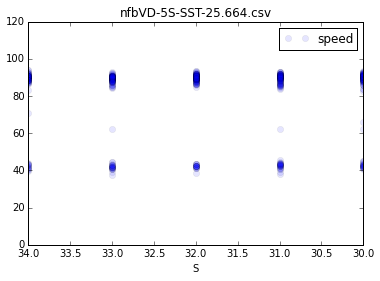

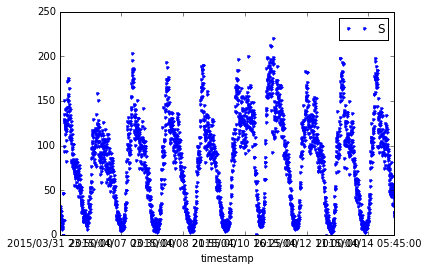

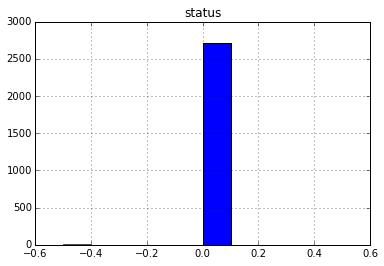

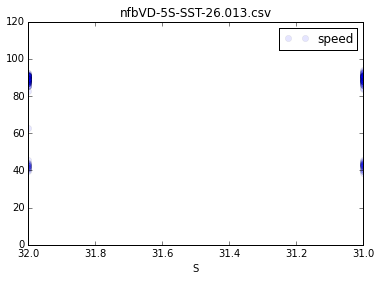

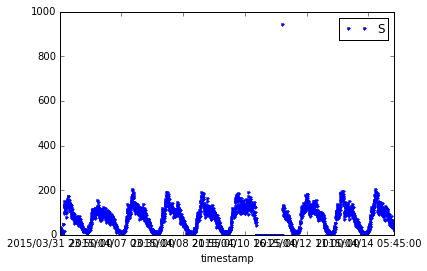

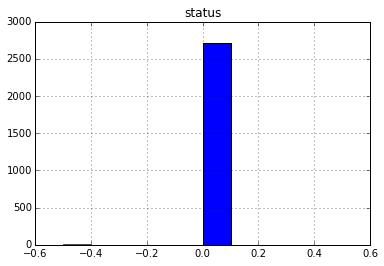

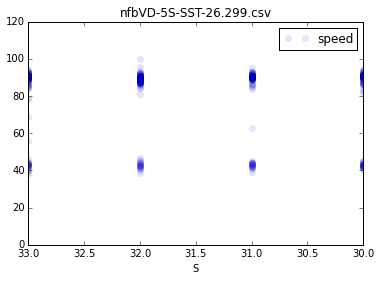

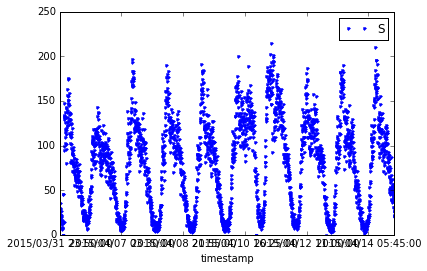

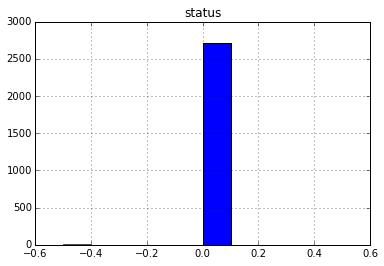

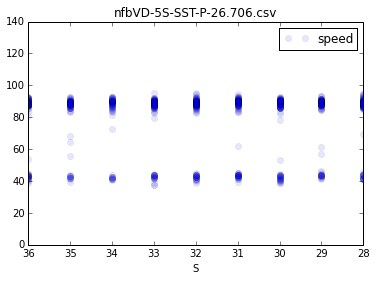

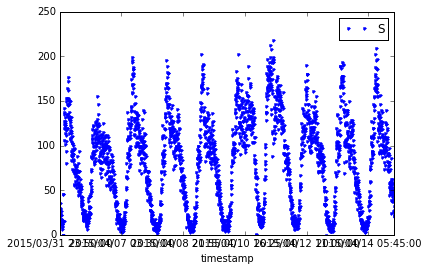

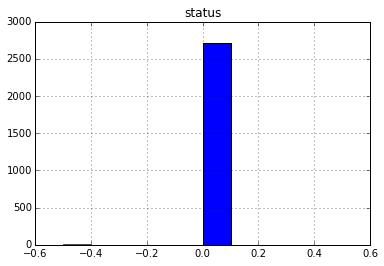

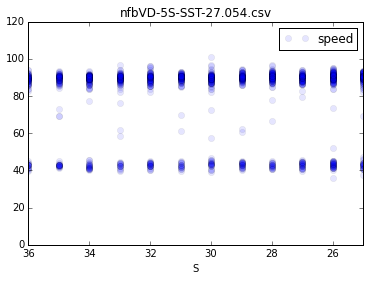

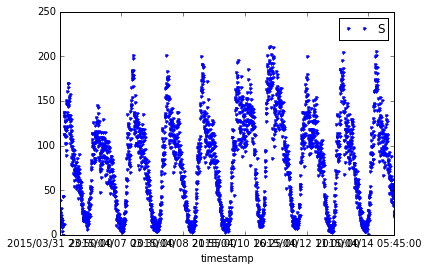

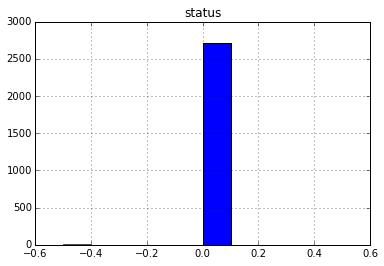

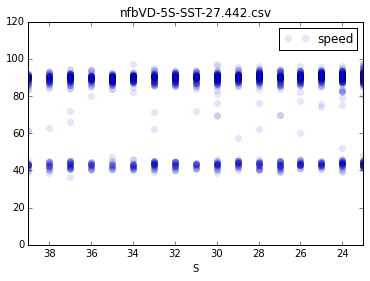

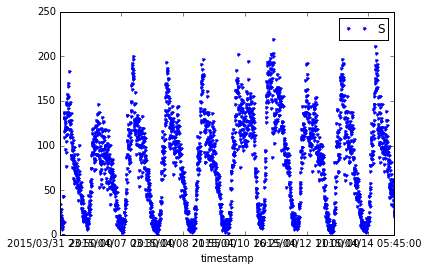

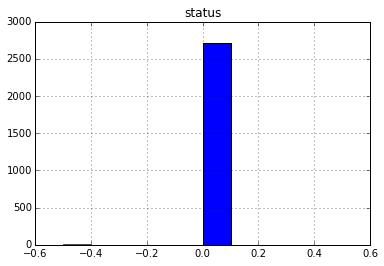

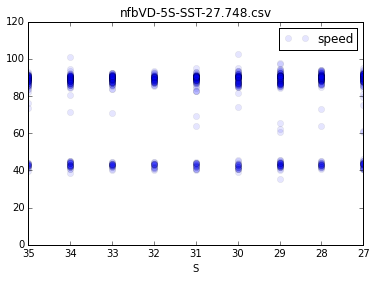

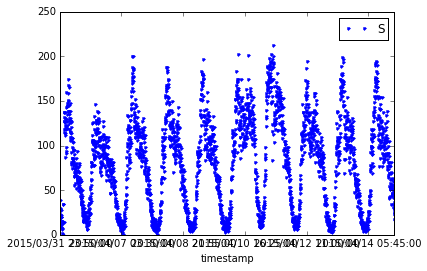

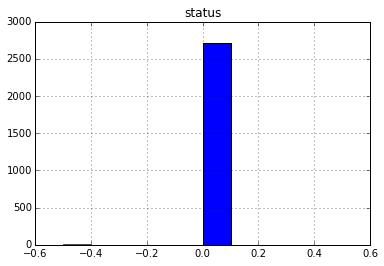

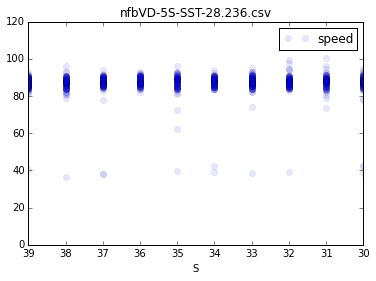

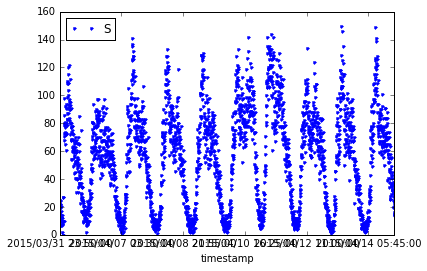

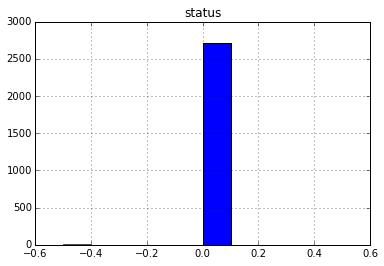

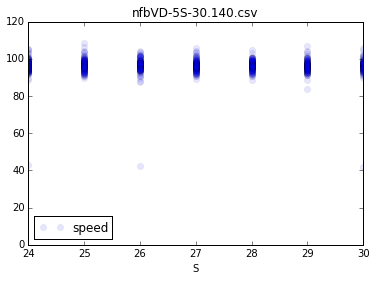

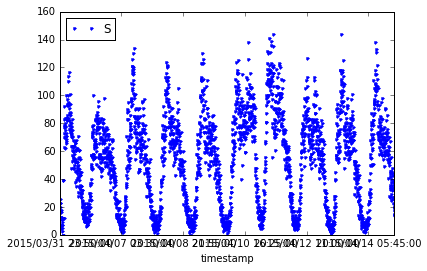

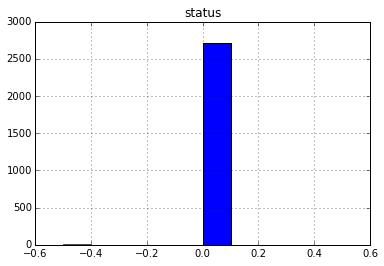

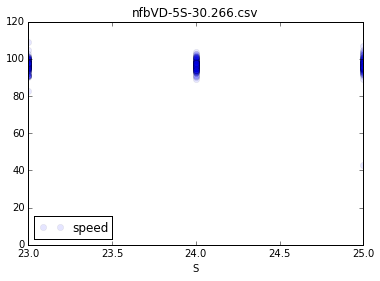

In [83]:
flow_map = []
speed_map = []
lane_count = []
kms = []

for (sensor, km, df) in southbound_data:
    """
    if 'SDT' in sensor:
        continue
        
    if 'PST' in sensor:
        continue
        
    if 'SST' in sensor:
        continue
        
    if 'TCIC' in sensor:
        continue
        
    if 'SDIC' in sensor:
        continue
        
    if 'PLIC' in sensor:
        continue
    """
    
    df = df[df['lane_count'] == 2]
        
    if len(df) == 0:
        continue
        
    df.index = df['timestamp']    
    df.sort('timestamp', inplace = True)    
    
    timestamp = df['timestamp'].tolist()
    kms.append(km)
    
    flow_map.append(df['S'])
    speed_map.append(df['speed'])
    lane_count.append(df['lane_count'])
    
    df[:'2015/04/15'].plot('timestamp', 'S', linestyle = 'None', marker = '.')
    plt.show()

    df[:'2015/04/15'].hist('status')
    plt.show()

    df.plot('S', 'speed', linestyle = 'None', marker = 'o', alpha = 0.1)
    plt.title(sensor)
    plt.show()

In [84]:
n_x = len(flow_map)
n_t = len(flow_map[0])

In [85]:
print len(flow_map)
print [len(x) for x in flow_map]

print len(southbound_data)

64
[23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23137]
78


In [86]:
flow_matrix = np.asanyarray(flow_map)
speed_matrix = np.asanyarray(speed_map)

(64, 23137)
(64, 23137)


<matplotlib.colorbar.Colorbar instance at 0x169297e60>

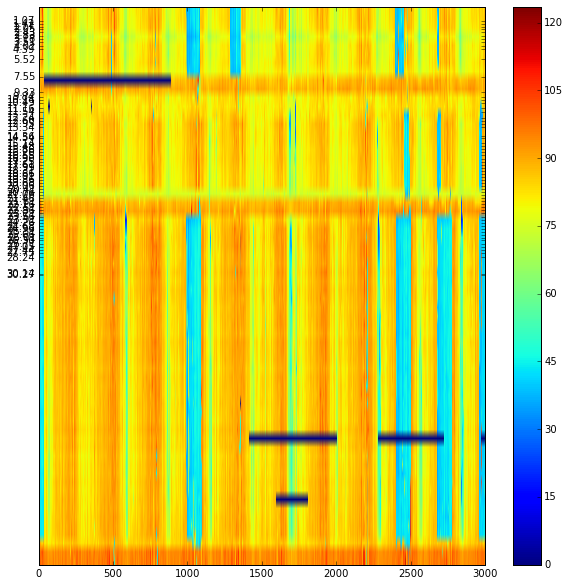

In [91]:
print speed_matrix.shape
print flow_matrix.shape

plt.figure(figsize = (10, 10))
plt.imshow(speed_matrix[:,:3000], aspect='auto')
plt.yticks(kms)
plt.colorbar()


In [ ]:
plt.figure(figsize = (10, 10))
plt.subplot(211)
plt.imshow(flow_matrix[:,:3000], aspect='auto')
plt.colorbar()
plt.subplot(212)
plt.imshow(lane_count, aspect = 'auto')
plt.colorbar()

In [ ]:
print flow_matrix.shape